# Summary

How well does historical experience rating predict average plus/minus differential in summer hat league 2016?

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src', 'data')
sys.path.append(src_dir)

In [2]:
%aimport scrape_buda

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
import scrape_buda

In [42]:
ratings = scrape_buda.BudaRating()

In [43]:
data_dir = os.path.join(os.getcwd(), os.pardir, 'data', 'interim')

In [44]:
prefix = os.path.join(data_dir, 'data20160521')

In [45]:
ratings.scrape_buda(prefix)

Planning to scrape 110 leagues out of a total of 200 leagues in the BUDA database.
Spring Women's League and Clinics- 2017 is not Hat or Club, skipping 41360
Unable to find a database of scores for league 41287
U19 League - Fall- 2016 is not Hat or Club, skipping 41328
U16 League - Fall- 2016 is not Hat or Club, skipping 41324
Newton girls middle school team (Fall)- 2016 is not Hat or Club, skipping 41315
Fall Grandmasters Free Agents- 2016 is not Hat or Club, skipping 41303
Fall Grandmasters League- 2016 is not Hat or Club, skipping 41299
Fall Masters Hat League- 2016 is not Hat or Club, skipping 41297
Fall Worcester Hat League - 2016 is not Hat or Club, skipping 41292
Unable to find a database of scores for league 41282
Unable to find a database of scores for league 41278
Unable to find a database of scores for league 41272
Summer Worcester Hat League - 2016 is not Hat or Club, skipping 41064
Finished successfully with league 41051
U16 League - Summer- 2016 is not Hat or Club, skippi

In [49]:
indx = (ratings.allteams['season'] == 'Summer') & \
    (ratings.allteams['type'] == 'Club') & \
    (ratings.allteams['year'] == '2016')

In [50]:
len(ratings.allteams[indx])

78

In [54]:
ratings.observed_rating()

In [98]:
ratings.predicted_rating()

In [99]:
pd.set_option('display.max_rows', 500)
ratings.allteams[indx].sort('observed_ratings')

,divname,divrating,plusminus,season,teamid,teamname,type,year,observed_ratings,predicted_rating
3033,5/2 Div 3,900.0,-7.000000,Summer,40549,Spawning Alewives,Club,2016,480.000000,768.634360
3001,4/3 Div 3,1000.0,-8.100000,Summer,40614,123 Trap!,Club,2016,514.000000,690.568738
3029,5/2 Div 3,900.0,-4.833333,Summer,40545,M.O.B.,Club,2016,610.000000,826.551146
3031,5/2 Div 3,900.0,-3.312500,Summer,40449,SIR!,Club,2016,701.250000,766.536094
3027,5/2 Div 3,900.0,-2.526316,Summer,40544,Jiggy,Club,2016,748.421053,895.073277
3034,5/2 Div 3,900.0,-2.500000,Summer,40602,THEM!,Club,2016,750.000000,786.398241
3028,5/2 Div 3,900.0,-2.333333,Summer,40616,Killer Bees,Club,2016,760.000000,1082.391136
3007,4/3 Div 3,1000.0,-3.500000,Summer,40582,Top Shelf,Club,2016,790.000000,1064.964319
3032,5/2 Div 3,900.0,-1.714286,Summer,40591,Spam,Club,2016,797.142857,948.300328
3002,4/3 Div 3,1000.0,-2.916667,Summer,40532,Baboon Heart,Club,2016,825.000000,1091.542140


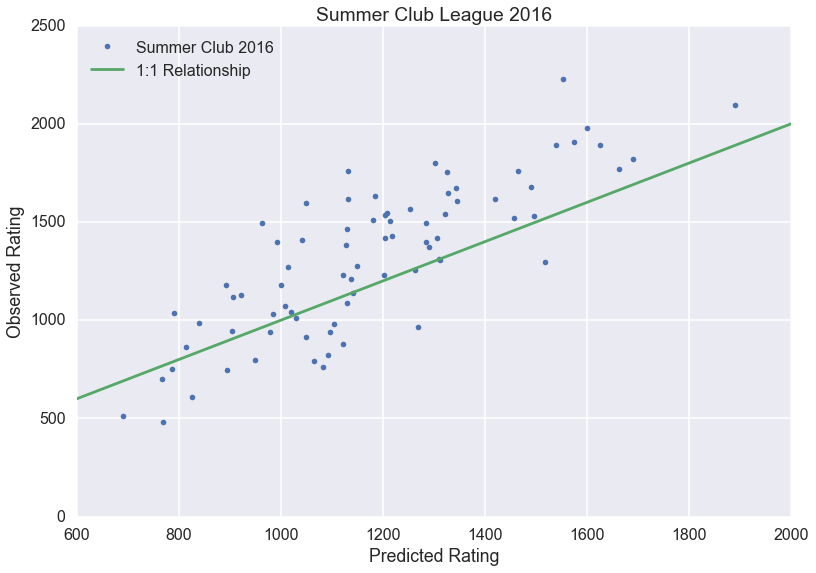

In [121]:
sns.set_context('poster')
indx = (ratings.allteams['season'] == 'Summer') & \
    (ratings.allteams['type'] == 'Club') & \
    (ratings.allteams['year'] == '2016')
plt.plot(ratings.allteams.ix[indx, 'predicted_rating'], ratings.allteams.ix[indx, 'observed_ratings'], '.', 
         label='Summer Club 2016')
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating')
plt.plot([600, 2000], [600, 2000], label='1:1 Relationship')
plt.title('Summer Club League 2016')
plt.legend(loc='upper left')

That green line above is not a fit to the data -- it's a straight up 1:1 line.  So just based on what teams someone has played on in the past, we can predict how well that person's new club team will do pretty well.  In general, the observed ratings are a bit higher than the predicted ratings.  This could be related to the way I handle players with no experience in the database.  Would be interesting to see if amount of departure from the 1:1 line corresponds to number of players with no experience.

In [122]:
ratings.allteams[indx]

,divname,divrating,plusminus,season,teamid,teamname,type,year,observed_ratings,predicted_rating
2969,4/3 Div 1,1800.0,7.142857,Summer,40546,AHOC,Club,2016,2228.571429,1553.307117
2970,4/3 Div 1,1800.0,-4.700000,Summer,40291,BBN,Club,2016,1518.000000,1457.081440
2971,4/3 Div 1,1800.0,1.812500,Summer,40612,FlowChart,Club,2016,1908.750000,1575.228568
2972,4/3 Div 1,1800.0,2.937500,Summer,40288,Gothrilla,Club,2016,1976.250000,1599.570190
2973,4/3 Div 1,1800.0,1.526316,Summer,40540,GrassBurner,Club,2016,1891.578947,1538.654993
2974,4/3 Div 1,1800.0,-2.052632,Summer,40583,"Live Poultry, Fresh Killed (LPFK)",Club,2016,1676.842105,1489.931771
2975,4/3 Div 1,1800.0,-0.500000,Summer,40590,Swingers,Club,2016,1770.000000,1663.108784
2976,4/3 Div 1,1800.0,-0.692308,Summer,40593,TuneSquad,Club,2016,1758.461538,1131.635716
2977,4/3 Div 1,1800.0,-0.800000,Summer,40289,Turtle Boy,Club,2016,1752.000000,1325.323881
2978,4/3 Div 1,1800.0,1.571429,Summer,40539,Zerg Rush!,Club,2016,1894.285714,1625.082950


Now let's take a look at Summer Hat League data.

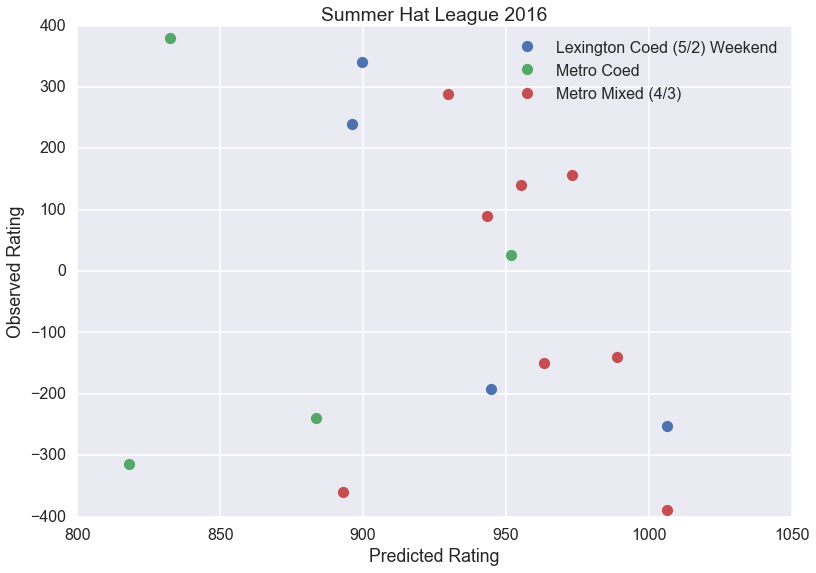

In [123]:
sns.set_context('poster')
indx = (ratings.allteams['season'] == 'Summer') & \
    (ratings.allteams['type'] == 'Hat') & \
    (ratings.allteams['year'] == '2016')
divnames = ratings.allteams.ix[indx, 'divname'].unique()
for divname in divnames:
    subindx = indx = (ratings.allteams['season'] == 'Summer') & \
        (ratings.allteams['type'] == 'Hat') & \
        (ratings.allteams['year'] == '2016') & \
        (ratings.allteams['divname'] == divname)

    plt.plot(ratings.allteams.ix[indx, 'predicted_rating'], ratings.allteams.ix[indx, 'observed_ratings'], 'o', 
             label=divname)
plt.xlabel('Predicted Rating')
plt.ylabel('Observed Rating')
# plt.plot([600, 2000], [600, 2000], label='1:1 Relationship')
plt.title('Summer Hat League 2016')
plt.legend(loc='best')

Not much correlation here at all.  We're definitely in the small sample size regime here, but if anything there is evidence for anti-correlation in this diagram.  Probably indicates that historical experience is not very applicable to the population of players in the summer hat league universe.  For example, there are lots and lots of players with no experience in the database, and this method doesn't handle those very well at this point.  Another point is that the baseline of predicted ratings really only varies by 100 - 150 points or so in this league.  In spring hat league, for comparison, the baseline of predicted ratings varies by 200 - 250 points.

This probably indicates that historical experience is going to be important in leagues where the range in talent is large; spring hat league, winter hat league, holiday hat league, maybe fall hat league.